In [4]:
from functions import *
from flags import * 

In [9]:
# Filtrar contratos : concursos públicos com CPV's começados por 72
cpub = cpv('72', 'Concurso público')

# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72
pb = preco_base3(cpub)
pc = preco_contrato3(cpub)

/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

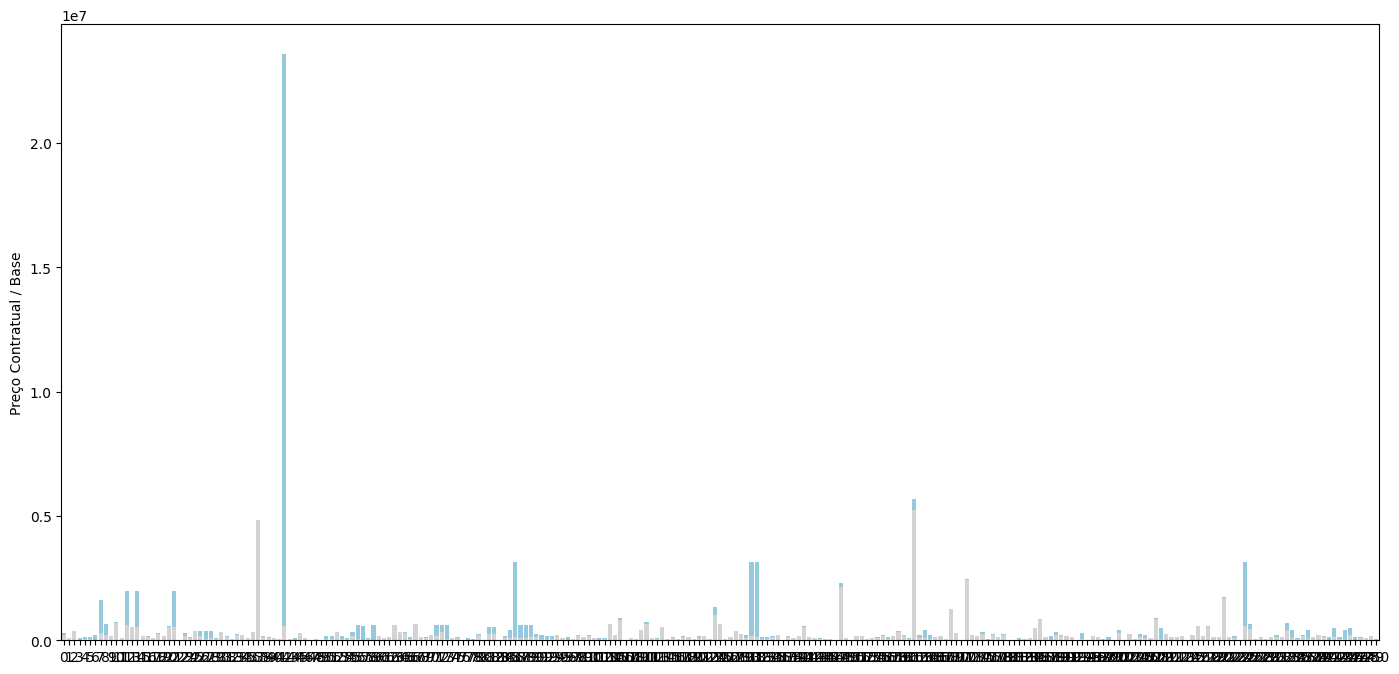

In [11]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.astype('float')

plt.figure(figsize=(17,8))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

In [15]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([188]),)

In [13]:
# Índice do contrato com maior rácio 
print(np.where(pb/pc > 10), pb[91], pc[91])
HTML(contrato(cpub[91]).to_html(index=False))
url('10315878')

/tmp/ipykernel_133903/379441107.py:2: RuntimeWarning: divide by zero encountered in divide
  print(np.where(pb/pc > 10), pb[91], pc[91])


(array([ 42,  56,  57,  59,  73,  86,  96, 102, 131, 132, 176, 188, 199,
       209]),) 222165.81 67774.0
A abrir numa sessão existente do navegador…


True

In [7]:
redflag(pb, pc, 0.1, cpub, 20)

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/flags.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = pbase[i] / pcontr[i]


(('10322139',),
 ('10324626',),
 ('10271560',),
 ('10271389',),
 ('10271520',),
 ('10273922',),
 ('10273652',),
 ('10273533',),
 ('10285558',),
 ('10274928',),
 ('10332117',),
 ('10281825',),
 ('10280946',),
 ('10280375',),
 ('10280297',),
 ('10279713',),
 ('10284270',),
 ('10283646',),
 ('10283551',),
 ('10286838',),
 ('10289442',),
 ('10291509',),
 ('10290955',),
 ('10293359',),
 ('10295857',),
 ('10299255',),
 ('10303836',),
 ('10307363',),
 ('10307301',),
 ('10306289',),
 ('10305831',),
 ('10309857',),
 ('10309847',),
 ('10308597',),
 ('10312468',),
 ('10312461',),
 ('10334216',),
 ('10336036',),
 ('10311506',),
 ('10314006',),
 ('10320992',),
 ('10338678',),
 ('10338639',),
 ('10337328',),
 ('10337213',),
 ('10222772',),
 ('10223896',),
 ('10223875',),
 ('10223856',),
 ('10223386',),
 ('10223371',),
 ('10223362',),
 ('10223302',),
 ('10226605',),
 ('10230715',),
 ('10230582',),
 ('10230493',),
 ('10230326',),
 ('10230212',),
 ('10230172',),
 ('10228788',),
 ('10228718',),
 ('10228

In [8]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_133903/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))


array([ 1.328,  1.033,  1.   ,  4.688,  3.143,  2.973,  7.779,  5.73 ,
        2.986,  1.   ,  1.072,  1.007,  3.212,  1.005,  3.755,  1.014,
        1.267,  1.   ,  1.164,  1.   ,  1.036,  3.732,  1.006,  1.687,
        1.209,  1.083,  2.299,  9.293,  4.673,  2.137,  1.   ,  1.067,
        1.03 ,  1.102,  1.   ,  1.067,  1.   ,  1.   ,  1.222,  1.478,
        1.004,  1.261, 40.503,  1.011,  5.055,  1.   ,  1.12 ,  1.594,
        1.055,  1.558,  2.869,  3.044,  1.   ,  4.906,  2.212,  2.053,
       16.608, 28.361,  2.   , 37.36 ,  1.   ,  1.081,  1.002,  1.   ,
        1.027,  1.033,  2.207,  1.03 ,  1.   ,  1.815,  1.   ,  3.288,
        1.885, 12.347,  1.121,  1.326,  1.   ,  3.023,  1.219,  1.169,
        4.39 ,  2.348,  2.348,  1.002,  2.492,  4.941, 20.904,  7.996,
        5.375,  4.613,  2.301,  3.278,  2.625,  3.136,  1.   ,  1.077,
       39.   ,  1.339,  1.274,  0.999,  1.089,  1.092, 13.165,  1.333,
        1.   ,  1.   ,  1.068,  1.005,  1.006,  1.002,  1.042,  1.153,
      